In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics

In [4]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [5]:
df = df_raw
df_X = df[[c for c in df.columns if c != 'vote']]
s_y = df.vote
X_raw = df_X.values
y_raw = s_y.values

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_raw, y_raw,
    test_size=0.4,
    random_state=20200502
)

clf = svm.LinearSVC(random_state=20200502)

print('The model:\n')
display(clf)
print()

print('The training time:\n')
%time clf.fit(X_train, y_train)
print()

y_train_hat = clf.predict(X_train)

print('The training set metrics:\n')
print(metrics.classification_report(y_train, y_train_hat))

y_test_hat = clf.predict(X_test)

print('The testing set metrics:\n')
print(metrics.classification_report(y_test, y_test_hat))

The model:



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20200502, tol=0.0001,
          verbose=0)


The training time:

CPU times: user 22.9 ms, sys: 499 µs, total: 23.4 ms
Wall time: 23.4 ms

The training set metrics:

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       330
         1.0       0.95      0.78      0.85       236

    accuracy                           0.89       566
   macro avg       0.90      0.87      0.88       566
weighted avg       0.90      0.89      0.89       566

The testing set metrics:

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       221
         1.0       0.93      0.77      0.84       157

    accuracy                           0.88       378
   macro avg       0.89      0.86      0.87       378
weighted avg       0.89      0.88      0.88       378



/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
# NOTE: may cause data leakage
def report_combination(preprocess, clf):
    
    global X_raw
    global y_raw

    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X_raw, y_raw,
        test_size=0.4,
        random_state=20200502
    )
    
    X_train_p = preprocess(X_train)
    X_test_p = preprocess(X_test)

    print('The model:\n')
    display(clf)
    print()

    print('The training time:\n')
    %time clf.fit(X_train_p, y_train)
    print()

    y_train_hat = clf.predict(X_train_p)
    
    print('The training set metrics:\n')
    print(metrics.classification_report(y_train, y_train_hat))

    y_test_hat = clf.predict(X_test_p)
    
    print('The testing set metrics:\n')
    print(metrics.classification_report(y_test, y_test_hat))
    
    # for the explaining later
    res = lambda: 1
    res.clf = clf
    res.X_train_p = X_train_p
    res.X_test_p = X_test_p
    return res

In [8]:
_ = report_combination(preprocessing.scale,
                       svm.LinearSVC(random_state=20200502))

The model:



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20200502, tol=0.0001,
          verbose=0)


The training time:

CPU times: user 12.1 ms, sys: 346 µs, total: 12.4 ms
Wall time: 12.4 ms

The training set metrics:

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       330
         1.0       0.90      0.91      0.90       236

    accuracy                           0.92       566
   macro avg       0.91      0.92      0.91       566
weighted avg       0.92      0.92      0.92       566

The testing set metrics:

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       221
         1.0       0.86      0.91      0.89       157

    accuracy                           0.90       378
   macro avg       0.90      0.90      0.90       378
weighted avg       0.90      0.90      0.90       378



/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Almost 2x faster with slightly better metrics!

In [9]:
res = report_combination(preprocessing.minmax_scale,
                         svm.LinearSVC(random_state=20200502))
res_minmax_linear_svc = res

The model:



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20200502, tol=0.0001,
          verbose=0)


The training time:

CPU times: user 3.07 ms, sys: 213 µs, total: 3.28 ms
Wall time: 3.17 ms

The training set metrics:

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       330
         1.0       0.89      0.91      0.90       236

    accuracy                           0.92       566
   macro avg       0.91      0.92      0.91       566
weighted avg       0.92      0.92      0.92       566

The testing set metrics:

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92       221
         1.0       0.86      0.92      0.89       157

    accuracy                           0.90       378
   macro avg       0.90      0.91      0.90       378
weighted avg       0.91      0.90      0.91       378



Another 5x faster with slightly even better metrics!

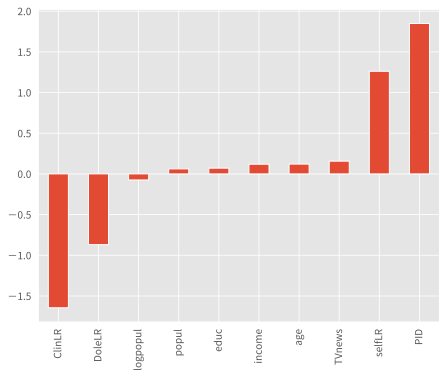

In [10]:
clf = res_minmax_linear_svc.clf
s = pd.Series(clf.coef_[0],
              index=df_X.columns)
s = s.sort_values()
s.plot.bar()

In [11]:
import shap
shap.initjs()

In [12]:
def explain_linear(res):
    
    global df_X

    clf = res.clf
    X_train_p = res.X_train_p
    X_test_p = res.X_test_p
    
    explainer = shap.LinearExplainer(clf, X_train_p)
    expected_value = explainer.expected_value
    shap_values = explainer.shap_values(X_test_p)
    
    with mpl.rc_context(rc={'axes.facecolor': 'white', 'axes.grid': False}):
        shap.summary_plot(shap_values,
                          X_test_p,
                          feature_names=df_X.columns)
    
    display(shap.force_plot(expected_value,
                            shap_values,
                            X_test_p,
                            feature_names=df_X.columns))

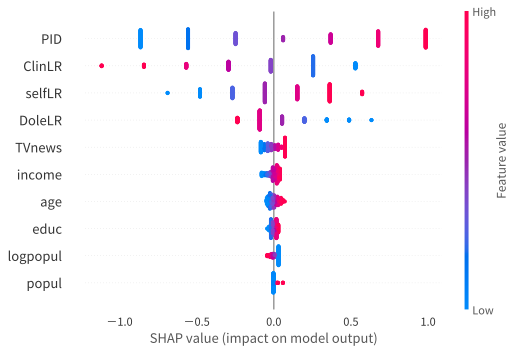

In [13]:
res = res_minmax_linear_svc
_ = explain_linear(res)

In [14]:
res = report_combination(preprocessing.minmax_scale,
                         svm.SVC(kernel='rbf',
                                 probability=True,
                                 random_state=20200502))
res_minmax_svc_rbf = res

The model:



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=20200502, shrinking=True,
    tol=0.001, verbose=False)


The training time:

CPU times: user 16.3 ms, sys: 553 µs, total: 16.9 ms
Wall time: 16.7 ms

The training set metrics:

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       330
         1.0       0.92      0.92      0.92       236

    accuracy                           0.93       566
   macro avg       0.93      0.93      0.93       566
weighted avg       0.93      0.93      0.93       566

The testing set metrics:

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       221
         1.0       0.89      0.90      0.89       157

    accuracy                           0.91       378
   macro avg       0.91      0.91      0.91       378
weighted avg       0.91      0.91      0.91       378



In [15]:
def explain_kernel(res):
    
    global df_X

    clf = res.clf
    X_train_p = res.X_train_p
    X_test_p = res.X_test_p
    
    X_train_p = shap.sample(X_train_p, 10, random_state=20200502)
    X_test_p = shap.sample(X_test_p, 10, random_state=20200502)
    
    explainer = shap.KernelExplainer(clf.predict_proba, X_train_p)
    expected_value = explainer.expected_value
    shap_values = explainer.shap_values(X_test_p, l1_reg='aic')  # it takes time
    
    with mpl.rc_context(rc={'axes.facecolor': 'white', 'axes.grid': False}):
        shap.summary_plot(shap_values,
                          X_test_p,
                          feature_names=df_X.columns)
    
    display(shap.force_plot(expected_value[0],
                            shap_values[0],
                            X_test_p,
                            feature_names=df_X.columns,
                            link='logit'))
    
    display(shap.force_plot(expected_value[1],
                            shap_values[1],
                            X_test_p,
                            feature_names=df_X.columns,
                            link='logit'))

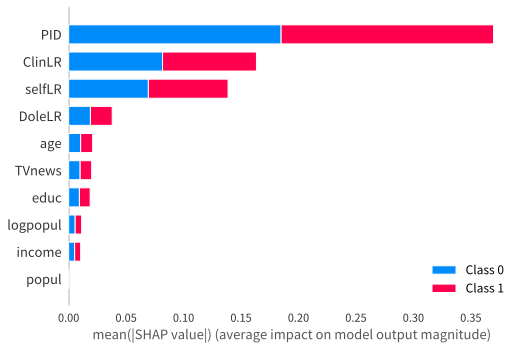

In [16]:
res = res_minmax_svc_rbf
_ = explain_kernel(res)